In [1]:
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp

import os

2024-04-10 17:42:48.954891: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-10 17:42:48.983024: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 17:42:48.983057: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 17:42:48.983093: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-10 17:42:48.990645: I tensorflow/core/platform/cpu_feature_g

In [2]:
import matplotlib.pyplot as plt

In [3]:
n = 1000
X_ij    = tf.convert_to_tensor(np.load("data/synthetic/synth_X_ij_"+str(n)+".npy"), dtype = tf.int32)
one_n_j = tf.convert_to_tensor(np.load("data/synthetic/US_one_n_j.npy"), dtype = tf.float32)

2024-04-10 17:42:51.609338: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-10 17:42:51.677985: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-10 17:42:51.678033: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-10 17:42:51.684324: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-10 17:42:51.684432: I tensorflow/compile

In [4]:
J = tf.shape(X_ij)[1]

In [5]:
K_current = 100
K_max = 2*K_current

a_0, b_0 = 2, 1
a,   b   = 1/2, 1/4

In [6]:
os.chdir("scripts/")
%run -i BNP.py
os.chdir("../")

In [7]:
seed_to_use = 123+n

tf.random.set_seed((seed_to_use+n))
np.random.seed((seed_to_use+n))

In [8]:
MCMC_iterations = 100

seed_MCMC_start, seed_MCMC_after_start  = tfp.random.split_seed( seed_to_use, n=2, salt='seed_MCMC_start_'+str(n))

In [9]:
output = BNP_MCMC_from_start(X_ij, one_n_j, K_current, K_max, a_0, b_0, a, b, MCMC_iterations, seed_MCMC_start, "multiple")

2024-04-10 17:42:53.907202: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-10 17:42:57.027664: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0xd52b670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-10 17:42:57.027714: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-04-10 17:42:57.033148: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-10 17:42:57.077367: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907

2024-04-10 17:42:57.653149: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [10]:
batch_size = 100
N = 1150934

initialization_MCMC = tuple(elem[-1,...] for elem in output)

seed_MCMC_current, seed_MCMC_after  = tfp.random.split_seed( seed_MCMC_after_start, n=2, salt='seed_MCMC_start_'+str(n))

In [11]:
tau_list = []

In [12]:
tau_output = BNP_MCMC_initialized_tau(X_ij, one_n_j, K_max, a_0, b_0, a, b, 
                                      initialization_MCMC, N, MCMC_iterations, 
                                      batch_size, seed_MCMC_current, "multiple", "Monte Carlo")
initialization_MCMC = tuple(elem[-1,...] for elem in tau_output[0])

In [13]:
tau_list.append(tau_output[1])

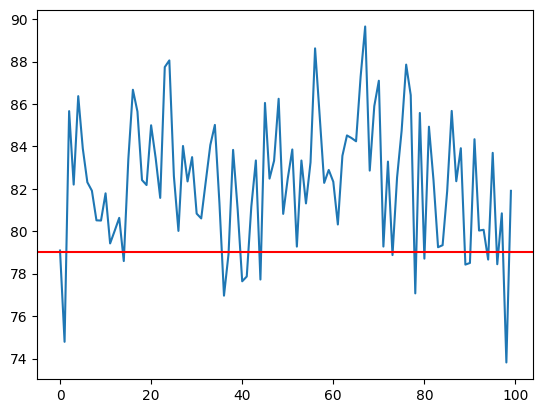

In [14]:
plt.plot(tf.concat(tau_list, axis = 0 ))
plt.axhline(79, color = "red")

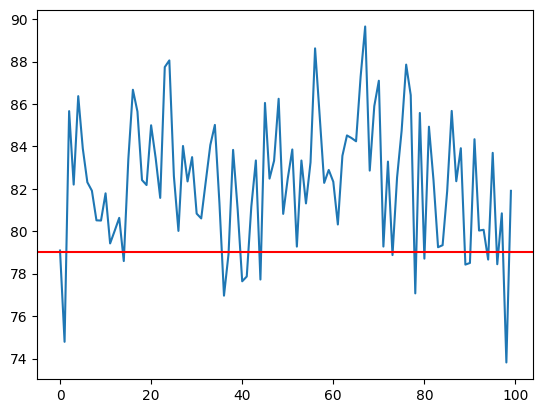

In [ ]:
plt.plot(tf.concat(tau_list, axis = 0 ))
plt.axhline(79, color = "red")

# Dealing with structural zeros

In [3]:
domain_j = tf.convert_to_tensor([2, 10, 3, 5, 2], dtype = tf.int32)

current_constraint = tf.convert_to_tensor([[1, 1, 0, 0, 0],
                                           [2, 0, 0, 0, 1],
                                           [1, 0, 0, 3, 0],
                                           [0, 0, 0, 2, 2]], dtype = tf.int32)

2024-04-09 08:26:03.173544: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-09 08:26:04.019011: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-09 08:26:04.019149: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-09 08:26:04.040903: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-09 08:26:04.041032: I tensorflow/compile

In [4]:
os.chdir("scripts/")
%run -i BNP_structural_zeros.py
os.chdir("../")

In [5]:
current_constraint = disjoint_constraint(domain_j, current_constraint)
current_constraint

2024-04-09 08:26:06.485085: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


inside_loop 1
inside_loop 2
inside_loop 3
outside_loop 1
inside_loop 1
inside_loop 2
inside_loop 3
inside_loop 4
inside_loop 5
inside_loop 6
inside_loop 7
inside_loop 8
inside_loop 9
inside_loop 10
inside_loop 11
outside_loop 2
inside_loop 1
inside_loop 2
inside_loop 3
inside_loop 4
inside_loop 5
inside_loop 6


<tf.Tensor: shape=(7, 5), dtype=int32, numpy=
array([[2, 0, 0, 0, 1],
       [0, 0, 0, 2, 2],
       [1, 0, 0, 3, 0],
       [1, 1, 0, 1, 0],
       [1, 1, 0, 4, 0],
       [1, 1, 0, 5, 0],
       [1, 1, 0, 2, 1]], dtype=int32)>

# US data with structural

# Real data

fai tabella

In [110]:
one_n_j = np.load("data/US/structural_zeros/US_one_n_j.npy")

domain_j = tf.cast(tf.reduce_sum(one_n_j, axis = 1), dtype = tf.int32)
names = ["AGE", "SEX", "MARST", "RACE", "EDUC", "EMPSTAT", "INCTOT", "VETSTAT", "NCHILD", "HCOVANY"]

In [111]:
domain_j

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 9,  2,  6,  5, 11,  4, 10,  3,  5,  2], dtype=int32)>

In [112]:
current_constraint = tf.convert_to_tensor([[1, 0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype = tf.int32)

# EMSTAT
for i in range(2, domain_j[5]+1):

    new_current_constraint = tf.convert_to_tensor([[1, 0, 0, 0, 0, i, 0, 0, 0, 0]], dtype = tf.int32)

    current_constraint = tf.concat((current_constraint, new_current_constraint), axis = 0)

for a in range(2, 3):

    # EMSTAT
    for i in range(1, domain_j[5]+1):

        new_current_constraint = tf.convert_to_tensor([[a, 0, 0, 0, 0, i, 0, 0, 0, 0]], dtype = tf.int32)

        current_constraint = tf.concat((current_constraint, new_current_constraint), axis = 0)

In [113]:
for a in range(1, 2):

    # MARST
    for i in range(1, domain_j[2]+1):

        new_current_constraint = tf.convert_to_tensor([[a, 0, i, 0, 0, 0, 0, 0, 0, 0]], dtype = tf.int32)

        current_constraint = tf.concat((current_constraint, new_current_constraint), axis = 0)

In [114]:
for a in range(1, 4):

    # VETSTATUS
    for i in range(1, domain_j[7]+1):

        new_current_constraint = tf.convert_to_tensor([[a, 0, 0, 0, 0, 0, 0, i, 0, 0]], dtype = tf.int32)

        current_constraint = tf.concat((current_constraint, new_current_constraint), axis = 0)

In [115]:
for a in range(1, 4):

    # EDUC
    for i in range(5+a-1, domain_j[4]+1):

        new_current_constraint = tf.convert_to_tensor([[a, 0, 0, 0, i, 0, 0, 0, 0, 0]], dtype = tf.int32)

        current_constraint = tf.concat((current_constraint, new_current_constraint), axis = 0)

In [116]:
for a in range(1, 3):

    # INCOME
    for i in range(2, domain_j[6]+1):

        new_current_constraint = tf.convert_to_tensor([[a, 0, 0, 0, 0, 0, i, 0, 0, 0]], dtype = tf.int32)

        current_constraint = tf.concat((current_constraint, new_current_constraint), axis = 0)

In [117]:
for a in range(1, 3):

    # NCHILD
    for i in range(2, domain_j[8]+1):

        new_current_constraint = tf.convert_to_tensor([[a, 0, 0, 0, 0, 0, 0, 0, i, 0]], dtype = tf.int32)

        current_constraint = tf.concat((current_constraint, new_current_constraint), axis = 0)

In [118]:
current_constraint

<tf.Tensor: shape=(67, 10), dtype=int32, numpy=
array([[ 1,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  3,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  4,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  3,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  4,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  4,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  5,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  6,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 2,  0,  0,  

In [44]:
create_disjoint = disjoint_constraint(domain_j, current_constraint)

KeyboardInterrupt: 

In [ ]:
np.save("disjoint_constraints", create_disjoint.numpy())

In [362]:
disjoint_constraint(domain_j, current_constraint)

2024-04-05 23:27:28.846942: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at strided_slice_op.cc:117 : INVALID_ARGUMENT: slice index 0 of dimension 0 out of bounds.


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:GPU:0}} slice index 0 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

In [206]:
free_cells_dim = tf.cast(current_constraint==0, dtype = tf.int32)*tf.expand_dims(domain_j, axis = 0)
free_cells = tf.reduce_prod(tf.where(free_cells_dim==0, tf.ones(tf.shape(free_cells_dim), dtype = tf.int32), free_cells_dim), axis =1)

In [207]:
sorting_index = tf.argsort(free_cells)[::-1]
current_constraint_sorted = tf.gather(current_constraint, sorting_index, axis = 0)

In [208]:
current_constraint_sorted

<tf.Tensor: shape=(4, 5), dtype=int32, numpy=
array([[2, 0, 0, 0, 1],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 2, 2],
       [1, 0, 0, 3, 0]], dtype=int32)>

In [209]:
S_d = current_constraint_sorted[0:1,:]

In [210]:
Pending = current_constraint_sorted[1:,:]

In [211]:
tf.shape(Pending)[0]

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [212]:
S_d

<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[2, 0, 0, 0, 1]], dtype=int32)>

In [213]:
Pending

<tf.Tensor: shape=(3, 5), dtype=int32, numpy=
array([[1, 1, 0, 0, 0],
       [0, 0, 0, 2, 2],
       [1, 0, 0, 3, 0]], dtype=int32)>

In [214]:
mu = Pending[0,:]
Pending = Pending[1:,:]

In [215]:
S_d, mu

(<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[2, 0, 0, 0, 1]], dtype=int32)>,
 <tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 1, 0, 0, 0], dtype=int32)>)

In [216]:
def nonempy_intersection_index(S_d, mu):
    expanded_mu = tf.expand_dims(mu, axis = 0)*tf.ones(tf.shape(S_d), dtype = tf.int32)

    S_d_compare_mu = tf.where(S_d==0,         expanded_mu, S_d)
    mu_compare_S_d = tf.where(expanded_mu==0, S_d,         expanded_mu)

    return tf.where(tf.reduce_all(S_d_compare_mu==mu_compare_S_d, axis = 1))[:,0]

In [217]:
ComparList = tf.gather(S_d, nonempy_intersection_index(S_d, mu), axis = 0)
ComparList

<tf.Tensor: shape=(0, 5), dtype=int32, numpy=array([], shape=(0, 5), dtype=int32)>

In [218]:
if tf.shape(ComparList)[0]==0:
    print("stica")

stica


In [180]:
S_d     = tf.concat((S_d, tf.expand_dims(mu, axis = 0)), axis = 0)
mu      = Pending[0,:]
Pending = Pending[1:,:]

In [181]:
S_d, mu, Pending

(<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
 array([[2, 0, 0, 0, 1],
        [1, 1, 0, 0, 0]], dtype=int32)>,
 <tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 0, 2, 2], dtype=int32)>,
 <tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[1, 0, 0, 3, 0]], dtype=int32)>)

In [182]:
ComparList = tf.gather(S_d, nonempy_intersection_index(S_d, mu), axis = 0)
ComparList

<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[1, 1, 0, 0, 0]], dtype=int32)>

In [183]:
def what_to_expand(mu, ComparList):
    expanded_mu               = tf.expand_dims(mu, axis = 0)*tf.ones(tf.shape(ComparList), dtype = tf.int32)
    bool_components_to_expand = tf.reduce_all(tf.stack((ComparList!=0, expanded_mu==0), axis =-1), axis = -1)
    
    components_to_expand_list = []
    domain_to_expand_list     = []
    CompareList_components_list = []

    for i in range(tf.shape(bool_components_to_expand)[0]):

        components_to_expand      = tf.where(bool_components_to_expand[i])[:,0]
        components_to_expand_list.append(components_to_expand)

        domain_to_expand          = tf.gather(domain_j, components_to_expand)
        domain_to_expand_list.append(domain_to_expand)

        ComparList_components = tf.gather(ComparList[i], components_to_expand)
        CompareList_components_list.append(ComparList_components)

    return components_to_expand_list, domain_to_expand_list, CompareList_components_list

In [184]:
components_to_expand_list, domain_to_expand_list, CompareList_components_list = what_to_expand(mu, ComparList)

In [185]:
def expanded_mu(mu, components_to_expand_current, domain_to_expand_current, CompareList_components_current):
    new_mu_list = []
    new_mu = mu

    for i in range(tf.shape(domain_to_expand_current)[0]):
        increment_current_current = tf.cast(tf.one_hot(components_to_expand_current[i], tf.shape(mu)[0]), dtype = tf.int32)

        for iter in range(domain_to_expand_current[i]):
            new_mu = new_mu + increment_current_current
            # print(new_mu)
            if new_mu[components_to_expand_current[i]]==CompareList_components_current[i]:
                new_blue_print = new_mu

            else:
                new_mu_list.append(new_mu)

        new_mu = new_blue_print

    return tf.stack(new_mu_list, axis = 0)

In [186]:
def create_mu_to_add(components_to_expand_list, domain_to_expand_list, CompareList_components_list):
    expanded_mu_list = []

    for i in range(tf.shape(components_to_expand_list)[0]):

        components_to_expand_current = components_to_expand_list[i]
        domain_to_expand_current     = domain_to_expand_list[i]
        CompareList_components_current = CompareList_components_list[i]

        expanded_mu_list.append(expanded_mu(mu, components_to_expand_current, domain_to_expand_current, CompareList_components_current))

    return tf.concat(expanded_mu_list, axis = 0)

In [187]:
mu_to_add = create_mu_to_add(components_to_expand_list, domain_to_expand_list, CompareList_components_list)

In [188]:
S_d = tf.concat((S_d, mu_to_add), axis = 0)
mu      = Pending[0,:]
Pending = Pending[1:,:]

In [191]:
Pending

<tf.Tensor: shape=(0, 5), dtype=int32, numpy=array([], shape=(0, 5), dtype=int32)>

In [192]:
tf.shape(Pending)[0]==0

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [193]:
ComparList = tf.gather(S_d, nonempy_intersection_index(S_d, mu), axis = 0)
ComparList

<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[1, 1, 0, 0, 0]], dtype=int32)>

In [165]:
components_to_expand_list, domain_to_expand_list, CompareList_components_list = what_to_expand(mu, ComparList)
mu_to_add = create_mu_to_add(components_to_expand_list, domain_to_expand_list, CompareList_components_list)

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object is not callable

In [166]:
S_d = tf.concat((S_d, mu_to_add), axis = 0)

In [138]:
S_d

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[2, 0, 0, 0, 1],
       [1, 1, 0, 0, 0],
       [2, 0, 0, 2, 2],
       [1, 2, 0, 2, 2],
       [1, 2, 0, 3, 0]], dtype=int32)>

In [209]:
expanded_mu = tf.expand_dims(mu, axis = 0)*tf.ones(tf.shape(S_d), dtype = tf.int32)

common_non_free_components = tf.reduce_all(tf.stack((S_d!=0, expanded_mu!=0), axis =-1), axis = -1)

S_d_common_non_zero = tf.where(common_non_free_components, S_d,         tf.zeros(tf.shape(S_d),         dtype = tf.int32))
mu_common_non_zero  = tf.where(common_non_free_components, expanded_mu, tf.zeros(tf.shape(expanded_mu), dtype = tf.int32))

is_empty_1 = tf.reduce_all(S_d_common_non_zero==mu_common_non_zero, axis = 1)

In [213]:
tf.reduce_all(tf.stack((S_d!=0, expanded_mu==0), axis =-1), axis = -1)

<tf.Tensor: shape=(1, 5), dtype=bool, numpy=array([[ True,  True, False, False, False]])>

In [204]:
common_non_free_components

<tf.Tensor: shape=(1, 5), dtype=bool, numpy=array([[False, False, False, False, False]])>

In [179]:
ComparList = []

for elem in S_d:

    if check_empy_intersection(elem, mu)=="non-empty":

        ComparList.append(elem)

In [180]:
ComparList

[<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 1, 0, 0, 0], dtype=int32)>]

In [182]:
mu

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 0, 2, 2], dtype=int32)>